# Pratique

### Prepare

Filmes populares do IMDB

O IMDB é um famoso site de  reviews de filmes e seriados. Uma das páginas mais acessadas do website é o ranking de filmes mais bem votados. Neste exercício, vamos extrair informações deste website:

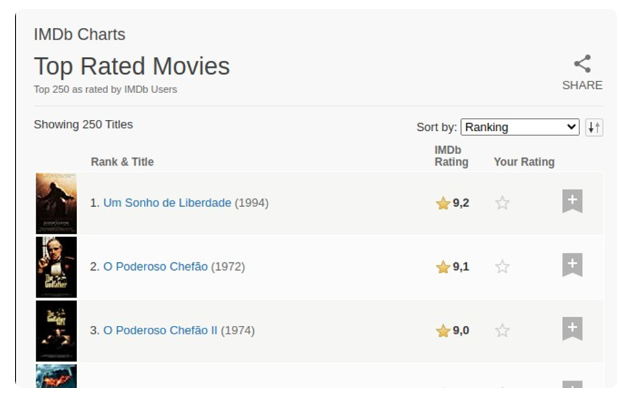

# Tarefas

## Parte 1: Arquivo Robots.txt

1. Utilize o pacote Python requests para fazer o download do conteúdo do arquivo robots.txt do site do IMDB e salve numa variável chamada robots , este é o link: https://www.imdb.com/robots.txt

2. Com o conteúdo na variável  robots , verifique se a palavra  top  ou  charts está presente no conteúdo do texto. Se sim, imprima  True , senão imprima  False.


In [8]:
# TAREFA 1
import requests
from requests.exceptions import HTTPError

robots = None
URL = 'https://www.imdb.com/robots.txt'

try:
  resposta = requests.get(URL)
  resposta.raise_for_status()
except HTTPError as exc:
  print(exc)
else:
  robots = resposta.text

print(robots)

# robots.txt for https://www.imdb.com properties
User-agent: *
Disallow: /OnThisDay
Disallow: /ads/
Disallow: /ap/
Disallow: /mymovies/
Disallow: /r/
Disallow: /register
Disallow: /registration/
Disallow: /search/name-text
Disallow: /search/title-text
Disallow: /find
Disallow: /find$
Disallow: /find/
Disallow: /tvschedule
Disallow: /updates
Disallow: /watch/_ajax/option
Disallow: /_json/video/mon
Disallow: /_json/getAdsForMediaViewer/
Disallow: /list/ls*/_ajax
Disallow: /list/ls*/export
Disallow: /*/*/rg*/mediaviewer/rm*/tr
Disallow: /*/rg*/mediaviewer/rm*/tr
Disallow: /*/mediaviewer/*/tr
Disallow: /title/tt*/mediaviewer/rm*/tr
Disallow: /name/nm*/mediaviewer/rm*/tr
Disallow: /gallery/rg*/mediaviewer/rm*/tr
Disallow: /tr/
Disallow: /title/tt*/watchoptions
Disallow: /search/title/?title_type=feature,tv_movie,tv_miniseries,documentary,short,video,tv_short&release_date=,2020-12-31&lists=%21ls538187658,%21ls539867036,%21ls538186228&view=simple&sort=num_votes,asc&aft
Disallow: /name/nm*/fil

In [7]:
# TAREFA 2
# Validando se existe as palavras top ou charts
contem_top_chart = "top" in robots.lower() or "charts" in robots.lower()
print(contem_top_chart)

False


## Parte 2: Crawling & Scraping

- Utilize os pacotes Python  requests  e  beautifulsoup4  para extrair os 10 filmes mais populares do IMDB (titulo, ano e nota), este é o link:
https://www.imdb.com/chart/top/

- Escreva os dados extraídos no arquivo csv  imdb.csv  separado por  ;  no formato indicado no material de apoio.

In [15]:
import requests
from bs4 import BeautifulSoup
import csv

# Header do navegador
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36 OPR/80.0.4170.91'
}

# URL da página do IMDB
URL = 'https://www.imdb.com/chart/top/'

# Fazendo a requisição HTTP
response = requests.get(URL, headers = headers)
print(response)

<Response [200]>


In [49]:
# Parser do HTML com o beautiful
soup = BeautifulSoup(response.text, 'html.parser')

# Encontrar os itens de filmes na página
filmes = soup.find_all("h3", {"class": "ipc-title__text"})  # Selecionar pelos títulos

# Lista para armazenar os 10 primeiros filmes
top10_filmes = []

# Validando os filmes que retornaram
print(filmes)

[<h3 class="ipc-title__text">IMDb Charts</h3>, <h3 class="ipc-title__text">1. The Shawshank Redemption</h3>, <h3 class="ipc-title__text">2. The Godfather</h3>, <h3 class="ipc-title__text">3. The Dark Knight</h3>, <h3 class="ipc-title__text">4. The Godfather Part II</h3>, <h3 class="ipc-title__text">5. 12 Angry Men</h3>, <h3 class="ipc-title__text">6. The Lord of the Rings: The Return of the King</h3>, <h3 class="ipc-title__text">7. Schindler's List</h3>, <h3 class="ipc-title__text">8. Pulp Fiction</h3>, <h3 class="ipc-title__text">9. The Lord of the Rings: The Fellowship of the Ring</h3>, <h3 class="ipc-title__text">10. The Good, the Bad and the Ugly</h3>, <h3 class="ipc-title__text">11. Forrest Gump</h3>, <h3 class="ipc-title__text">12. The Lord of the Rings: The Two Towers</h3>, <h3 class="ipc-title__text">13. Fight Club</h3>, <h3 class="ipc-title__text">14. Inception</h3>, <h3 class="ipc-title__text">15. Star Wars: Episode V - The Empire Strikes Back</h3>, <h3 class="ipc-title__text

In [50]:
for i, filme in enumerate(filmes[1:11]):  # Itera apenas pelos 10 primeiros filmes
      titulo = filme.text.strip()  # Extrair texto do título

      # Obter o ano do filme baseado na nova estrutura
      ano_span = filme.find_next("span", {"class": "sc-300a8231-7 eaXxft cli-title-metadata-item"})
      ano = ano_span.text.strip("()") if ano_span else "N/A"  # Remover parênteses do ano ou retornar "N/A"

      # Obter a nota com base na classe especificada
      nota_span = filme.find_next("span", {"class": "ipc-rating-star--rating"})
      nota = nota_span.text.strip() if nota_span else "N/A"

      # Adicionar os dados em formato de lista
      top10_filmes.append([titulo, ano, nota])

# Validando as informações da tabela
for item in top10_filmes:
  print(item)

['1. The Shawshank Redemption', '1994', '9.3']
['2. The Godfather', '1972', '9.2']
['3. The Dark Knight', '2008', '9.0']
['4. The Godfather Part II', '1974', '9.0']
['5. 12 Angry Men', '1957', '9.0']
['6. The Lord of the Rings: The Return of the King', '2003', '9.0']
["7. Schindler's List", '1993', '9.0']
['8. Pulp Fiction', '1994', '8.9']
['9. The Lord of the Rings: The Fellowship of the Ring', '2001', '8.9']
['10. The Good, the Bad and the Ugly', '1966', '8.8']


In [72]:
import pandas as pd

# Exibindo numa tabela
df = pd.DataFrame(top10_filmes, columns=["Título", "Ano", "Nota"])
print(df)

                                              Título   Ano Nota
0                        1. The Shawshank Redemption  1994  9.3
1                                   2. The Godfather  1972  9.2
2                                 3. The Dark Knight  2008  9.0
3                           4. The Godfather Part II  1974  9.0
4                                    5. 12 Angry Men  1957  9.0
5   6. The Lord of the Rings: The Return of the King  2003  9.0
6                                7. Schindler's List  1993  9.0
7                                    8. Pulp Fiction  1994  8.9
8  9. The Lord of the Rings: The Fellowship of th...  2001  8.9
9                 10. The Good, the Bad and the Ugly  1966  8.8


In [75]:
# Escrevendo os dados extraídos num arquivo CSV
with open('imdb.csv', 'w', newline='', encoding='utf-8') as arquivo_csv:
    writer = csv.writer(arquivo_csv, delimiter=',')
    writer.writerow(["Título", "Ano", "Nota"])
    writer.writerows(top10_filmes)

print("Arquivo 'imdb.csv' criado com sucesso")

Arquivo 'imdb.csv' criado com sucesso
